# Tf-Idf

## Wprowadzenie

**Tf-idf** — metoda liczenia wagi terminów w oparciu o ich częstość w dokumencie (*tf*, *term frequency*) oraz ich rozkład w całym korpusie (*idf*, *inverse document frequency*).



$$tf{\text -}idf_{ij}=tf_{ij}\times idf_i $$

Gdzie:
* $i$ — indeks terminu,
* $j$ — indeks dokumentu,
* $tf_{ij}$ — liczba wystąpień $i$-tego terminu  w $j$-tym dokumencie.

$$idf_i=log\frac{|D|}{|\{d:t_i \in d\}|}$$

Gdzie:

* $|D|$ — liczba dokumentów w zbiorze,
* $|\{d:t_i \in d\}|$ — liczba dokumentów zawierających przynajmniej jedno wystąpienie terminu $t_i$.


Wagi Tf-idf faworyzują słowa występujące w niewielu dokumentach, ponieważ mają większą siłę dyskryminacyjną.

Wartość idf w zależności od liczby dokumentów, w których dany termin występuje, dla kolekcji 100 dokumentów.


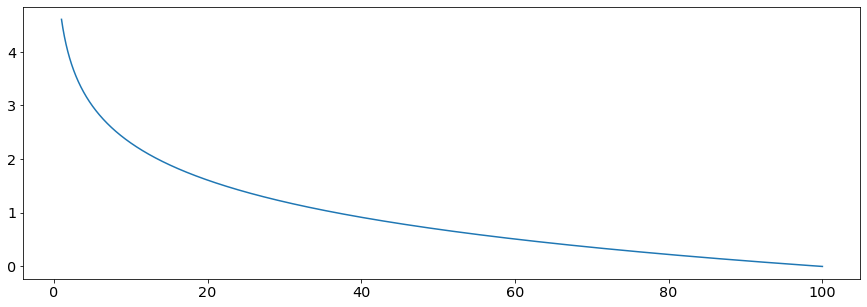

In [1]:
import pylab
import numpy as np

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

x = np.linspace(1, 100, 100000)
y = np.log(100/x)

pylab.plot(x, y)
print("Wartość idf w zależności od liczby dokumentów, w których dany termin występuje, dla kolekcji 100 dokumentów.")

**Zastosowania**

*   generowanie słów kluczowych dla dokumentu,
*   grupowanie dokumentów,
*   wyszukiwanie dokumentów.



## Wektoryzacja Tf-idf

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
texts = [
  "dłuto to narzędzie używane przez stolarza",
  "piła to narzędzie wykorzystywane przez stolarza",
  "stetoskop to narzędzie używane przez lekarza",
  "skalpel to narzędzie wykorzystywane przez lekarza",
  "łopata to narzędzie używane przez rolnika"
]

In [4]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(texts)

for row in X.toarray():
  print(["%.3f" % col if col > 0 else '0    ' for col in row])

['0.600', '0    ', '0.286', '0    ', '0.286', '0    ', '0    ', '0    ', '0.484', '0.286', '0.402', '0    ', '0    ']
['0    ', '0    ', '0.276', '0.579', '0.276', '0    ', '0    ', '0    ', '0.467', '0.276', '0    ', '0.467', '0    ']
['0    ', '0.484', '0.286', '0    ', '0.286', '0    ', '0    ', '0.600', '0    ', '0.286', '0.402', '0    ', '0    ']
['0    ', '0.467', '0.276', '0    ', '0.276', '0    ', '0.579', '0    ', '0    ', '0.276', '0    ', '0.467', '0    ']
['0    ', '0    ', '0.269', '0    ', '0.269', '0.565', '0    ', '0    ', '0    ', '0.269', '0.379', '0    ', '0.565']


In [5]:
vectorizer.get_feature_names()

['dłuto',
 'lekarza',
 'narzędzie',
 'piła',
 'przez',
 'rolnika',
 'skalpel',
 'stetoskop',
 'stolarza',
 'to',
 'używane',
 'wykorzystywane',
 'łopata']

In [6]:
vectorizer.idf_

array([2.09861229, 1.69314718, 1.        , 2.09861229, 1.        ,
       2.09861229, 2.09861229, 2.09861229, 1.69314718, 1.        ,
       1.40546511, 1.69314718, 2.09861229])

In [7]:
for idf, word in sorted(zip(vectorizer.idf_, vectorizer.get_feature_names()), reverse=True):
  print("%0.3f  %s" % (idf, word))

2.099  łopata
2.099  stetoskop
2.099  skalpel
2.099  rolnika
2.099  piła
2.099  dłuto
1.693  wykorzystywane
1.693  stolarza
1.693  lekarza
1.405  używane
1.000  to
1.000  przez
1.000  narzędzie


### Normalizacja wektorów

In [8]:
print(np.sum(X[0].toarray()**2))

1.0


In [9]:
vectorizer_wnorm = TfidfVectorizer(norm=None)

X_wnorm = vectorizer_wnorm.fit_transform(texts)

for row in X_wnorm.toarray():
  print(["%.3f" % col if col > 0 else '0    ' for col in row])

['2.099', '0    ', '1.000', '0    ', '1.000', '0    ', '0    ', '0    ', '1.693', '1.000', '1.405', '0    ', '0    ']
['0    ', '0    ', '1.000', '2.099', '1.000', '0    ', '0    ', '0    ', '1.693', '1.000', '0    ', '1.693', '0    ']
['0    ', '1.693', '1.000', '0    ', '1.000', '0    ', '0    ', '2.099', '0    ', '1.000', '1.405', '0    ', '0    ']
['0    ', '1.693', '1.000', '0    ', '1.000', '0    ', '2.099', '0    ', '0    ', '1.000', '0    ', '1.693', '0    ']
['0    ', '0    ', '1.000', '0    ', '1.000', '2.099', '0    ', '0    ', '0    ', '1.000', '1.405', '0    ', '2.099']


## Podobieństwo dla wektoryzacji TfIdfVectorizer

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
sim_matrix = cosine_similarity(X, X)
sim_matrix

array([[1.        , 0.46252651, 0.40627383, 0.23651598, 0.38294631],
       [0.46252651, 1.        , 0.23651598, 0.44655926, 0.22293565],
       [0.40627383, 0.23651598, 1.        , 0.46252651, 0.38294631],
       [0.23651598, 0.44655926, 0.46252651, 1.        , 0.22293565],
       [0.38294631, 0.22293565, 0.38294631, 0.22293565, 1.        ]])

In [12]:
sim_text = zip([sim_matrix[0][n] for n in range(0, len(texts))], texts)

for sim, text in sorted(sim_text, reverse=True):
  print(f"{sim:<7.04}  {text[:50]}")

1.0      dłuto to narzędzie używane przez stolarza
0.4625   piła to narzędzie wykorzystywane przez stolarza
0.4063   stetoskop to narzędzie używane przez lekarza
0.3829   łopata to narzędzie używane przez rolnika
0.2365   skalpel to narzędzie wykorzystywane przez lekarza


## Porównanie z CountVectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

count_X = count_vectorizer.fit_transform(texts)

count_sim_matrix = cosine_similarity(count_X, count_X)
count_sim_matrix

array([[1.        , 0.66666667, 0.66666667, 0.5       , 0.66666667],
       [0.66666667, 1.        , 0.5       , 0.66666667, 0.5       ],
       [0.66666667, 0.5       , 1.        , 0.66666667, 0.66666667],
       [0.5       , 0.66666667, 0.66666667, 1.        , 0.5       ],
       [0.66666667, 0.5       , 0.66666667, 0.5       , 1.        ]])

In [14]:
sim_text = zip([count_sim_matrix[0][n] for n in range(0, len(texts))], texts)

for sim, text in sorted(sim_text, reverse=True):
  print(f"{sim:<7.04}  {text[:50]}")

1.0      dłuto to narzędzie używane przez stolarza
0.6667   łopata to narzędzie używane przez rolnika
0.6667   stetoskop to narzędzie używane przez lekarza
0.6667   piła to narzędzie wykorzystywane przez stolarza
0.5      skalpel to narzędzie wykorzystywane przez lekarza


## Podsumowanie


1.   **Tf-idf** jest miarą do wyliczania wagi terminów w dokumencie.
2.   Wagi terminów są wyliczane w kontekście określonego korpusu — nie jest możliwe wyliczenie wag *tf-idf* dla pojedynczego dokumentu w oderwaniu od korpusu.
3.  Miara faworyzuje słowa, które występują w niewielu dokumentach. Słowa rzadkie mają większą siłę dyskryminacyjną niż słowa częste.

